In [53]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import scienceplots
plt.style.use(["science", "grid"])

Henon map  
$x_{n+1} = y_n + 1 - a * x_n ^2$  
$y_{n+1} = b*x_n$

In [54]:
# parameters 
a = 1.4 
b = 0.3

In [55]:
def getNewX(x, y):
    return 1 - a*x*x + y

def getNewY(x, y):
    return b*x

def computeHenonMap(x0, y0, N):
    X = np.zeros(N)
    Y = np.zeros(N)

    X[0] = x0
    Y[0] = y0

    for i in trange(1, N):
        x_new = getNewX(X[i-1], Y[i-1])  # Use X[i-1] and Y[i-1]
        y_new = getNewY(X[i-1], Y[i-1])  # Use X[i-1] and Y[i-1]
        X[i] = x_new
        Y[i] = y_new

    return X, Y



In [56]:
# set initial values
x_1 = 0.1
y_1 = 0.1
x_2 = 0.2
y_2 = 0.3
x_3 = 0.001
y_3 = 0.001

N = 100000
Henon1_X, Henon1_Y = computeHenonMap(x_1, y_1, N)
Henon2_X, Henon2_Y = computeHenonMap(x_2, y_2, N)
Henon3_X, Henon3_Y = computeHenonMap(x_3, y_3, N)

# clear the first n elements from the trajectory since they may lay far away from the attractor



100%|██████████| 99999/99999 [00:00<00:00, 1646429.25it/s]


Text(0.5, 1.0, 'Trajectories on the Henon attractor \nTrajectories slightly offseted in y direction to better see them')

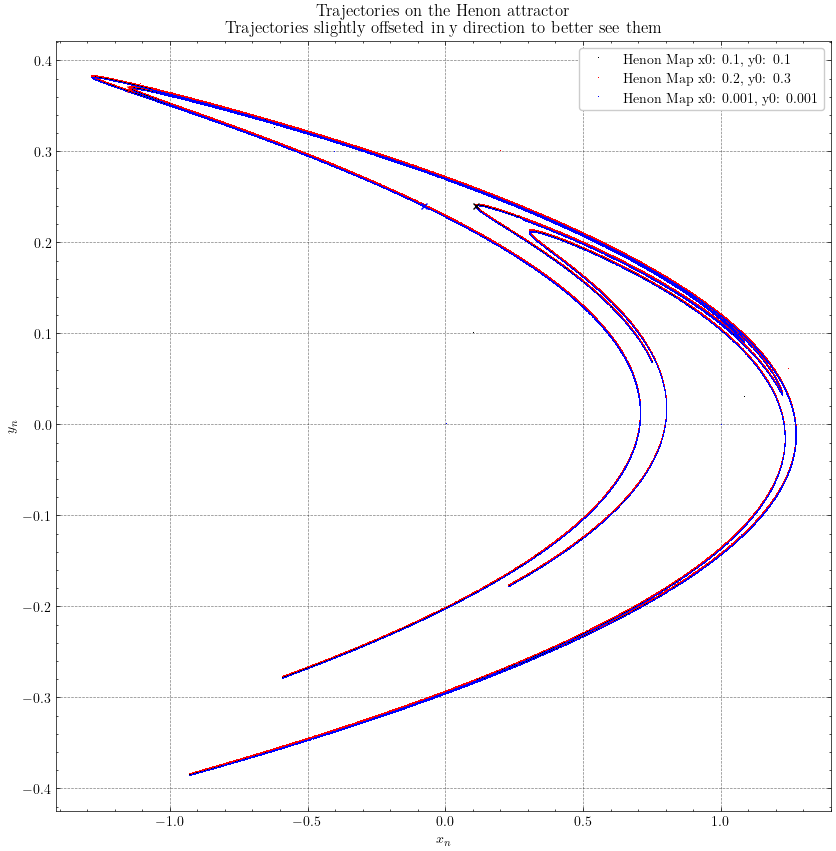

In [57]:
# n = 10
# # Henon1_X = Henon1_X[n:]
# # Henon1_Y = Henon1_Y[n:]
# # Henon2_X = Henon2_X[n:]
# # Henon2_Y = Henon2_Y[n:]
# # Henon3_X = Henon3_X[n:]
# # Henon3_Y = Henon3_Y[n:]

# # visualize the Henon Map

delta = 0.001

plt.figure(figsize=(10, 10))
plt.plot(Henon1_X, Henon1_Y, "k,", linewidth=1, label="Henon Map x0: {}, y0: {}".format(x_1, y_1))
plt.plot(Henon2_X, Henon2_Y+delta, "r,", markersize=4, label="Henon Map x0: {}, y0: {}".format(x_2, y_2))
plt.plot(Henon3_X, Henon3_Y-delta, "b,", markersize=5, label="Henon Map x0: {}, y0: {}".format(x_3, y_3))
plt.xlabel("$x_n$")
plt.ylabel("$y_n$")
plt.legend()
# plt.xlim(-1.5, 1.5)
# plt.ylim(-0.5, 0.5)

# make big dots at the initial points, and at the end points
# plt.plot(Henon1_X[0], Henon1_Y[0], "ko", markersize=5)
# plt.plot(Henon2_X[0], Henon2_Y[0], "ro", markersize=5)
# plt.plot(Henon3_X[0], Henon3_Y[0], "bo", markersize=5)

plt.plot(Henon1_X[-1], Henon1_Y[-1], "kx", markersize=5)
plt.plot(Henon2_X[-1], Henon2_Y[-1], "rx", markersize=5)
plt.plot(Henon3_X[-1], Henon3_Y[-1], "bx", markersize=5)

# description to the plot
plt.title("Trajectories on the Henon attractor \nTrajectories slightly offseted in y direction to better see them")

b.) Three plots of counting the bins

In [58]:
boxSizeMIN = 10**(-3)
boxSizeMAX = 2*10**(-2)


# box sizes
epsilon_values = np.linspace(boxSizeMIN, boxSizeMAX, 20)

# q values
q_ = np.array([0,1,2])

# Henon Parameters
a = 1.4 
b = 0.3

In [59]:
# compute a new Henon map
N = int(2*10**6)
x_1 = 0.1
y_1 = 0.1
HenonMapX, HenonMapY = computeHenonMap(x_1, y_1, N)
HenonMap = np.array([HenonMapX, HenonMapY])



100%|██████████| 1999999/1999999 [00:01<00:00, 1727274.90it/s]


In [60]:
# take on of the Henon Maps, discretize it with a grid of size epsilon

def sumDiscretizedTrajectory(map, q_values, epsilon_values):

    N = map.shape[1]

    # define the box sizes
    mapX = map[0, :]
    mapY = map[1, :]

    # determine the box size
    xMin = np.min(mapX)
    xMax = np.max(mapX)
    yMin = np.min(mapY)
    yMax = np.max(mapY)

    I_s = np.zeros((len(q_values), len(epsilon_values)))
    D_s = np.zeros((len(q_values), len(epsilon_values)))

    # loop over the q_values
    for j in trange(len(q_values)):
        q = q_values[j]

        # loop over the epsilon values
        for i in trange(len(epsilon_values)):
            epsilon = epsilon_values[i]

            Nbox = int((xMax-xMin)/epsilon) * int((yMax-yMin)/epsilon)

            GridBox = np.zeros((int((xMax - xMin) / epsilon) + 1, int((yMax - yMin) / epsilon) + 1))
            
            # Create the bins
            x_bins = np.linspace(xMin, xMax, int((xMax - xMin) / epsilon) + 1)
            y_bins = np.linspace(yMin, yMax, int((yMax - yMin) / epsilon) + 1)

            # loop over the trajectory
            for n in range(N-1):
                x = mapX[n]
                y = mapY[n]

                # Find the bins for x and y
                x_bin_Index = np.digitize(x, x_bins) - 1
                y_bin_Index = np.digitize(y, y_bins) - 1

                # Increment the grid box
                GridBox[x_bin_Index, y_bin_Index] += 1
        
            # determine the P_k $N_k / N_points$, and the I(q,epsilon)
            I = 0
            pk_s = np.zeros(Nbox)

            # flatten the GridBox array
            GridBoxFlatten = GridBox.flatten()

            for k in range(Nbox):
                pk_s[k] = GridBoxFlatten[k] / N
                I += pk_s[k]**q

            # update the I_s array
            I_s[j, i] = I

            # update the D_s array
            if q == 1:
                # sum of k=1 to Nboxes of pk * log(1/pk)
                tmp = 0

                for k in range(len(pk_s)):
                    if pk_s[k] != 0:
                        tmp += pk_s[k] * np.log(1/pk_s[k])
                
                D_s[j, i] = tmp

            else:
                D_s[j, i] = (1)/(1-q) * np.log(I)

            print("q: {}, epsilon: {}, I: {}, D: {}".format(q, epsilon, I, D_s[j, i]))
            
    return I_s, D_s



def sumDiscretizedTrajectory_fast(map, q_values, epsilon_values):
    N = map.shape[1]
    mapX, mapY = map

    xMin, xMax = np.min(mapX), np.max(mapX)
    yMin, yMax = np.min(mapY), np.max(mapY)

    I_s = np.zeros((len(q_values), len(epsilon_values)))
    D_s = np.zeros((len(q_values), len(epsilon_values)))

    for j in trange(len(q_values)):
        q = q_values[j]

        for i in trange(len(epsilon_values)):
            epsilon = epsilon_values[i]
            gridSizeX = int((xMax - xMin) / epsilon) + 1
            gridSizeY = int((yMax - yMin) / epsilon) + 1

            GridBox = np.zeros((gridSizeX, gridSizeY))

            x_bins = np.linspace(xMin, xMax, gridSizeX)
            y_bins = np.linspace(yMin, yMax, gridSizeY)

            x_indices = np.digitize(mapX, x_bins) - 1
            y_indices = np.digitize(mapY, y_bins) - 1

            np.add.at(GridBox, (x_indices, y_indices), 1)

            GridBoxFlat = GridBox.flatten()
            pk_s = GridBoxFlat / N

            valid_pk_s = pk_s[pk_s != 0]

            # I = np.sum(pk_s ** q)
            I = np.sum(valid_pk_s ** q)
            I_s[j, i] = I

    
            if q == 1:
                # Special case for q = 1 (Shannon entropy)
                # valid_pk_s = pk_s[pk_s != 0]
                D_s[j, i] = -np.sum(valid_pk_s * np.log(valid_pk_s))
            else:
                # General case for q != 1
                D_s[j, i] = (1 / (1 - q)) * np.log(I)

    return I_s, D_s

In [61]:
I_s, D_s = sumDiscretizedTrajectory_fast(HenonMap, q_, epsilon_values)

100%|██████████| 3/3 [00:16<00:00,  5.62s/it]


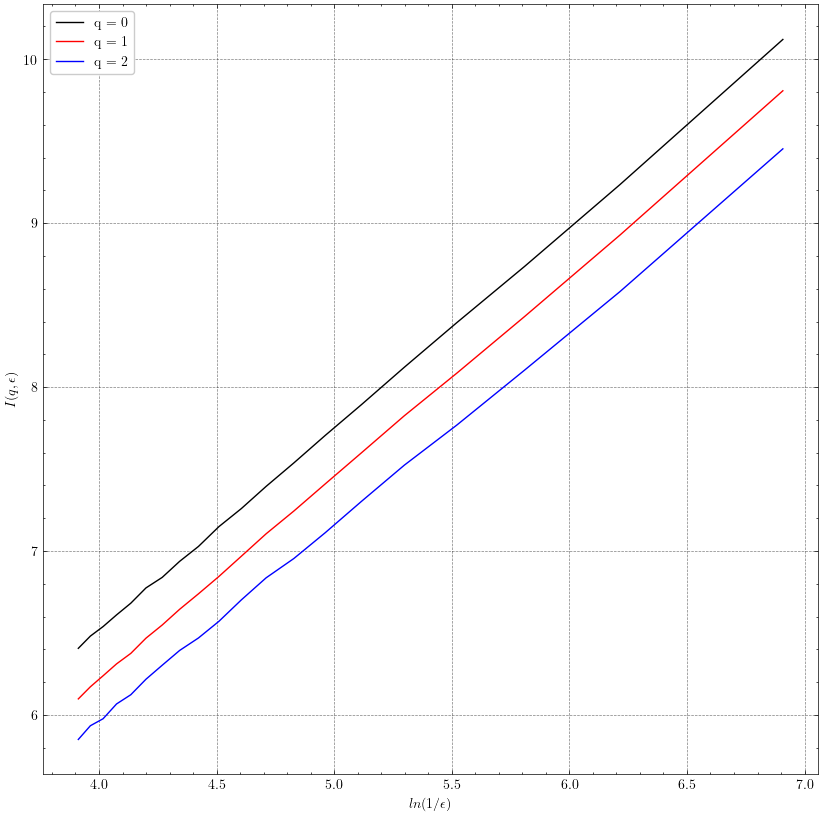

In [62]:
# visualize , x-axis ln(1/epsilon), y-axis I(q,epsilon)
plt.figure(figsize=(10, 10))
plt.plot(np.log(1/epsilon_values), D_s[0, :], "k-", label="q = {}".format(q_[0]))
plt.plot(np.log(1/epsilon_values), D_s[1, :], "r-", label="q = {}".format(q_[1]))
plt.plot(np.log(1/epsilon_values), D_s[2, :], "b-", label="q = {}".format(q_[2]))
plt.xlabel("$ln(1/\\epsilon)$")
plt.ylabel("$I(q, \\epsilon)$")
plt.legend()


In [63]:
# compute the thre slopes with polyfit
slope_1, intercept_1 = np.polyfit(np.log(1/epsilon_values), D_s[0, :], 1)
slope_2, intercept_2 = np.polyfit(np.log(1/epsilon_values), D_s[1, :], 1)
slope_3, intercept_3 = np.polyfit(np.log(1/epsilon_values), D_s[2, :], 1)


print("Slope 1: {}, for q=".format(slope_1) + str(q_[0]))
print("Slope 2: {}, for q=".format(slope_2) + str(q_[1]))
print("Slope 3: {}, for q=".format(slope_3) + str(q_[2]))


# print the results for OpenTA
print([slope_1, slope_2, slope_3])


Slope 1: 1.2332675707517917, for q=0
Slope 2: 1.2303142717666393, for q=1
Slope 3: 1.1886641206712605, for q=2
[1.2332675707517917, 1.2303142717666393, 1.1886641206712605]


d.) Make a graph of $D_q$ as a function of $q$, for $q \in [0, 4]$ with at least 9 different values of $q$. Your plot should confirm that $D_q$ is non-increasing (up to potential small deviations due to finite resolution $\epsilon$).

In [72]:

q_values = np.linspace(0,4,9)
epsilon_values = np.linspace(boxSizeMIN, boxSizeMAX, 8)

# compute the I_s and D_s for the Henon Map
I_s, D_s = sumDiscretizedTrajectory_fast(HenonMap, q_values, epsilon_values)

# compute the slopes for the different q values
slopes = np.zeros(len(q_values))
for i in range(len(q_values)):
    slopes[i], intercept = np.polyfit(np.log(1/epsilon_values), D_s[i, :], 1)



100%|██████████| 9/9 [00:02<00:00,  4.06it/s]


In [73]:
# print all slopes values  
print(slopes)
print(q_values)

[1.22128705 1.22495155 1.21838611 1.20612083 1.18657769 1.15717483
 1.11801157 1.07403502 1.03193671]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]


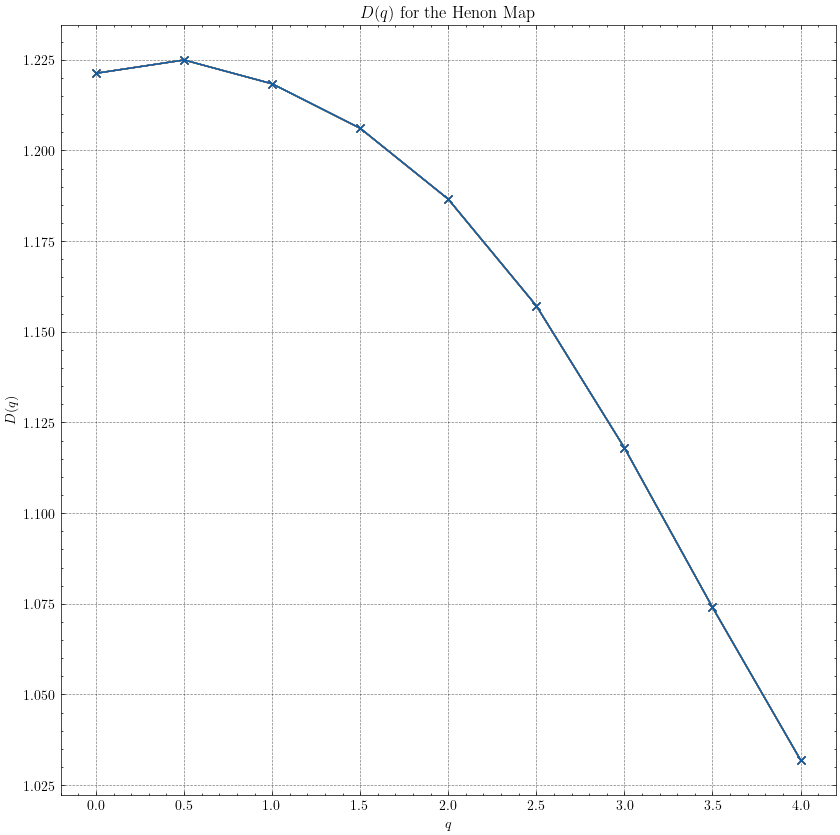

In [74]:


# visualize , x-axis q, y-axis D(q)
plt.figure(figsize=(10, 10))
for i in range(len(epsilon_values)):
    plt.plot(q_values, slopes, "x-")
plt.xlabel("$q$")
plt.ylabel("$D(q)$")
plt.title("$D(q)$ for the Henon Map");


e.) Compute the Lyapunov exponents $\lambda_1$ and $\lambda_2$ numerically. Give your result as the ordered vector [$\lambda_1$, $\lambda_2$] with $\lambda_1$ ≥ $\lambda_2$ with two decimal digits accuracy. (2 points)
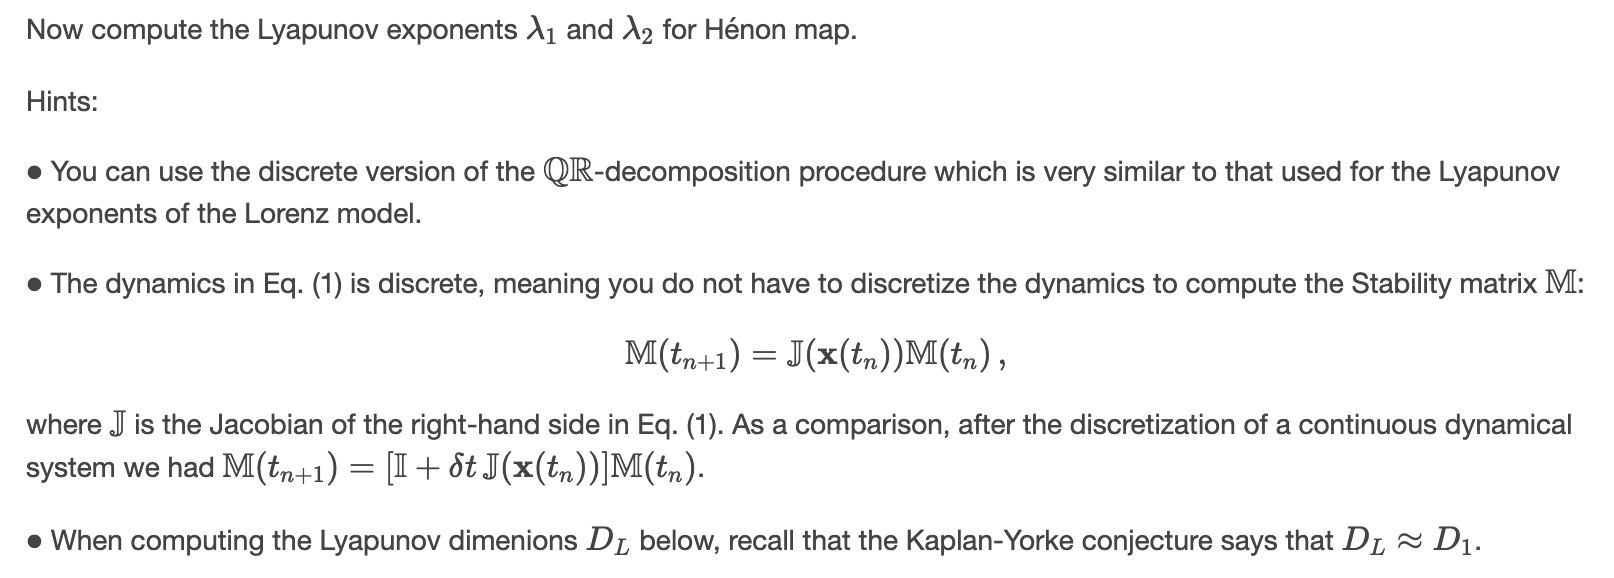

In [66]:
def Jacobian(x, y):
    return np.array([[-2*a*x, 1], [b, 0]])

def computeLyapunovExponent(x0, y0, map):
    
    N = map.shape[1]

    
    X = map[0, :]
    Y = map[1, :]
    
        # 2.) init Q, M0 and li
    Q = np.identity(2)
    M0 = np.identity(2)
    l1 = np.zeros(N)
    l2 = np.zeros(N)
    li_tracker = np.zeros((N, 2))

    Q_old = Q

    # skip the first Nstart steps  

    for n in trange(1,N):

        M_n = Jacobian(X[n], Y[n])
        Q, R = np.linalg.qr(np.matmul(M_n, Q_old))
        Q_old = Q

        R00 = np.log(np.abs(R[0,0]))
        R11 = np.log(np.abs(R[1,1]))

        #print(Rii)
        # add the R_ii to li
        l1[n] = l1[n-1] + R00
        l2[n] = l2[n-1] + R11


        # add li to the tracker and normalize
        li_tracker[n] = [l1[n] / (n), l2[n] / (n)]

    # Normalize the li
    li = np.array([l1[-1], l2[-1]]) / N

    return li, li_tracker



In [67]:
# compute a new Henon map
N = int(2*10**5)
x_1 = 0.1
y_1 = 0.1
HenonMapX, HenonMapY = computeHenonMap(x_1, y_1, N)
HenonMap = np.array([HenonMapX, HenonMapY])

LyapunovExponent = computeLyapunovExponent(x_1, y_1, HenonMap)



100%|██████████| 199999/199999 [00:02<00:00, 67498.32it/s]


In [68]:
# print the Lyapunov Exponent for OpenTA
Lamba1, Lambda2 = LyapunovExponent[0]
print([Lamba1, Lambda2])

[0.4209102408898591, -1.6248770253517548]


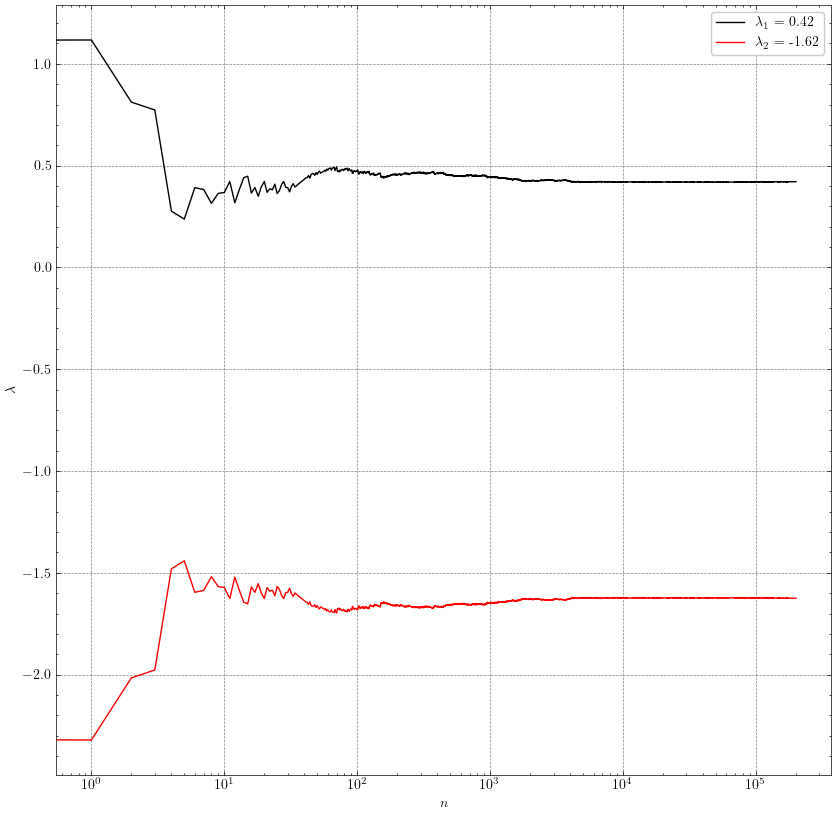

In [69]:
# visualize the Lyapunov Exponent and check if they converged
plt.figure(figsize=(10, 10))
plt.semilogx(LyapunovExponent[1][:, 0], "k-", label="$\\lambda_1$ = " + f'{LyapunovExponent[0][0]:.2f}')
plt.semilogx(LyapunovExponent[1][:, 1], "r-", label="$\\lambda_2$ = " + f'{LyapunovExponent[0][1]:.2f}')
plt.xlabel("$n$")
plt.ylabel("$\\lambda$")
plt.legend()


f.) Find the Lyapunov Dimension
To do so plot the cumulative sum and find where this intersects with the x-axis

Intersection point: (1.2590412900931627, 0.0)
Lyapunov Dimension: 1.2590412900931627


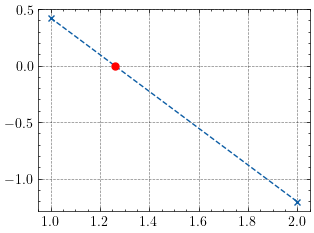

In [70]:
n = np.array([1,2])
Lambdas = np.array([LyapunovExponent[0][0], LyapunovExponent[0][1]])

LambdasCum = np.cumsum(Lambdas)

# compute intersection points
deltaY = LambdasCum[1] - LambdasCum[0]
deltaX = n[1] - n[0]
m = deltaY / deltaX
b = Lambdas[0] - m * n[0]
x_intersect = -b / m
y_intersect = m * x_intersect + b


plt.plot(n, LambdasCum, "x--", markersize=5)

plt.plot(x_intersect, y_intersect, "ro", markersize=5)

print("Intersection point: ({}, {})".format(x_intersect, y_intersect))

print("Lyapunov Dimension: {}".format(x_intersect))
